<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:Black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        2022 KAGGLE ML & DS SURVEY ANALYSIS
    </h3>
    </div>

<center>
<img style="float:right"; src="https://www.onlinemanipal.com/wp-content/uploads/2022/09/Data-Science-Life-cycle-768x767.png" width=350>
</center>

## Introduction
The goal of the challenge is to better understand the trend in Data Science and Machine Learning.

### <font color='289C4E'>Challenge objective<font><a class='anchor' id='top'></a>
Tell a data story about a subset of the data science community represented in this survey, through a combination of both narrative text and data exploration. The challenge is to deeply explore (through data) the impact, priorities, or concerns of a specific group of data science and machine learning practitioners.

### <font color='289C4E'>Focus of the Analysis<font><a class='anchor' id='top'></a>
As a Data Scientist enthusiats I am curious to know Data Scientist professionals interest, roadmap tools and prerequisite based on their responses to the survey. Questions asked and exploration made in the analysis are as below👇🏾.

### <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>
- [Bio-data of Data Scientist.](#bio_data)
- [Technical Tools and Platforms for Data Scientist.](#2)
- [Use of Machine Learning by Data Scientist.](#3)
- [Industry, Company Size and Data Team.](#4)

In [ ]:
pip install ipykernel

In [ ]:
pip install --upgrade nbformat

In [3]:
# Import python libraries for execution.
import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

In [4]:
# load data
ds_ml_data = pd.read_csv('kaggle_survey_2022_responses.csv')

In [5]:
# remove rows with survey question.
ds_ml_data = ds_ml_data.iloc[1:]

Before filtering Data Scientist rows, below is the distribution of Data Professionals that filled the survey.

* Suprisingly, **Data Scientist** filled the survey more by **18%** than other Data Professionals. 

In [6]:
def dist_graph(dataframe, column, rename_index, rename_column, title):
    row_count = dataframe[column].value_counts().to_frame().reset_index().rename({'index': rename_index, 
                                                                                  column: rename_column}, axis=1)
    row_count['total'] = row_count[rename_column].sum()
    row_count['pertcg'] = ((row_count[rename_column]/row_count['total'])*100).round(2)
    row_count2 = row_count.head(12)
#     display(row_count2) 

    fig = px.bar(row_count2, 
                 x= rename_column, 
                 y=  rename_index, 
                 width= 900, 
                 height= 600, 
                 title= title, 
                 hover_data= ['pertcg'])
    fig.update_layout(yaxis=dict(autorange="reversed"))
    fig.show()
dist_graph(ds_ml_data, 'Q23', 'data professionals', 'professionals_count', 'Data Professionals Distribution')

## Focus:
Filter Data Scientist sample data from the population of Data professionals that filled the survey.

In [7]:
ds_data = ds_ml_data[ds_ml_data['Q23']== 'Data Scientist']

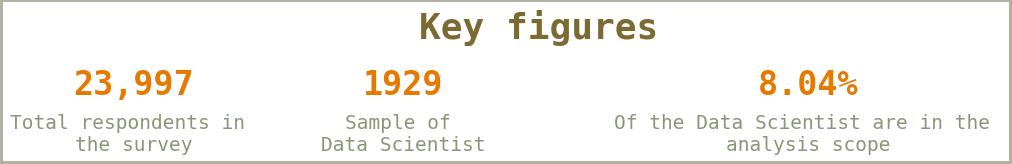

In [8]:
mpl.rcParams.update(mpl.rcParamsDefault)

fig1 = plt.figure(figsize=(5,2),facecolor='white')

ax1 = fig1.add_subplot(1,1,1)
font = 'monospace'
ax1.text(0.9, 0.8, "Key figures",color='#7b6b33',fontsize=26, fontweight='bold', fontfamily=font, ha='center')


ax1.text(0, 0.4, "{:,d}".format(ds_ml_data.shape[0]), color='#e67900', fontsize=24, fontweight='bold', 
         fontfamily=font, ha='center')
ax1.text(0, 0.001, "Total respondents in \nthe survey",color='#899778',fontsize=14, fontweight='light', 
         fontfamily=font,ha='center')

ax1.text(0.6, 0.4, "{}".format(ds_data.shape[0]), color='#e67900', fontsize=24, fontweight='bold', 
         fontfamily=font, ha='center')
ax1.text(0.6, 0.001, "Sample of \nData Scientist",color='#899778',fontsize=14, fontweight='light', 
         fontfamily=font,ha='center')


ax1.text(1.5, 0.4, "{}".format(round((ds_data.shape[0]/ds_ml_data.shape[0] )*100, 2))+"%", color='#e67900', 
         fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax1.text(1.5, 0.001, "Of the Data Scientist are in the \nanalysis scope",color='#899778',fontsize=14, 
         fontweight='light', fontfamily=font, ha='center')

ax1.set_yticklabels('')
ax1.tick_params(axis='y',length=0)
ax1.tick_params(axis='x',length=0)
ax1.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax1.spines[direction].set_visible(False)

fig1.subplots_adjust(top=0.9, bottom=0.2, left=0, hspace=1)

fig1.patch.set_linewidth(3)
fig1.patch.set_edgecolor('#B1b1a4')
fig1.patch.set_facecolor('white')
ax1.set_facecolor('white')
    
plt.show()

## Data Exploration:

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:Black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        Bio-data of Data Scientist<a class='anchor' id='bio_data'></a>
    </h3>
    </div>
    
   

### Experience Level and their Geography.
* **25%** of our Data Scientist respondent have over **5-10 years of experience writing code or programming**, this is to say every of the response are valid👌🏾.

* The country concentration, count each Data Scientist country in the dataset. The most geography population of Data Scientist that filled the survey are from **India and USA** having approximately, **29% and 18%** respectively.

In [9]:
dist_graph(ds_data, 'Q11', 'experience_level', 'experience_level_count', 'Experience Level Distribution') 

In [10]:
dist_graph(ds_data, 'Q4', 'country', 'country_count', 'Display of the Top Countries Distribution') 

In [11]:
country_data = ds_data.groupby(['Q4']).size().reset_index().rename(columns={0: 'count'})

fig = px.choropleth(country_data, 
                    locations="Q4", 
                    color="count", 
                    locationmode='country names',
                    range_color=[0,500],
                    color_continuous_scale=[(0, "#F0F0F0"), (1, '#01c9ff')],
                    template='seaborn')

fig.update_layout(
    title="World Map Location for Data Scientist Survey",
    font=dict(family="Monospace", size=14))

fig.show()

### Age and Gender Distribution.
* Our sample dataset mostly records age bracket between **25-29 and 30-34** as the most populated in the data science space. Hence, having **25% and 21%** respectively.

* In the gender distribution, there exist **male dominance** over female in the data science sphere, thereby, the male gender taking 82% of the 100% population.

* We have 21% more Men between 25-29 in the Data Science field.

In [12]:
fig = px.scatter(x=[0], 
                 y=[0], 
                 color_discrete_sequence=['#fff'])
# styling
fig.update_xaxes(visible=False) 
fig.update_yaxes(visible=False) 
fig.update_traces(textposition='top center')
fig.update_layout(height=300, 
                  width=500, 
                  plot_bgcolor='#fff', 
                  paper_bgcolor='#fff',
                  margin=dict(b=0,r=50,l=50,t=110),
                  title={'text': "<b>Gender Distribution ",
                         'y':0.8, 
                         'x':0.5, 
                         'xanchor': 'center', 'yanchor': 'top'},
                  font=dict(size=15, color='#666'),
                 )
fig.add_layout_image(
    dict(
        source="https://cdn3.iconfinder.com/data/icons/glypho-office-and-business/64/business-woman-512.png",
        xref="paper", 
        yref="paper",
        x=0.5, y=0.38,
        sizex=0.7, sizey=0.65,
        xanchor="right", yanchor="bottom", sizing= "contain",
    )
)
fig.add_layout_image(
    dict(
        source="https://media.istockphoto.com/vectors/businessman-icon-vector-id1083280462?k=20&m=1083280462&s=612x612&w=0&h=1Ww9Jf49_KYCNcN4B1sbg9dx_LvS-Ua_a_wvTI17Pqg=",
        xref="paper", yref="paper",
        x=0.9, y=0.38,
        sizex=0.6, sizey=0.63,
        xanchor="right", yanchor="bottom", sizing= "contain",
    )
)
fig.add_annotation(dict(x=0.37, y=0.25, ax=0, ay=0,
                    xref = "paper", yref = "paper", 
                    text= "<b>15.97%</b><br><b>Woman</b>"))
fig.add_annotation(dict(x=0.74, y=0.25, ax=0, ay=0,
                    xref = "paper", yref = "paper", 
                    text= "<b>82.32%</b><br>\n<b>Men</b>"))

In [13]:
age_gender = ds_data.groupby(['Q3', 'Q2']).size().reset_index().rename(columns={0: 'count', 'Q3': 'gender', 
                                                                                'Q2': 'age group'})
age_gender['total'] = age_gender['count'].sum()
age_gender['pertcg'] = ((age_gender['count']/age_gender['total'])*100).round(2)

fig = px.histogram(age_gender, 
                   x="age group", 
                   y="count", 
                   color='gender', 
                   barmode='overlay', 
                   hover_data=['pertcg'],
                   height=450,  
                   width= 900, 
                   title="Gender vs Age Distribution")
fig.show()

### Data Scientist Education Status.
* Interestingly, our sample Data Scientist are currently **100% not student**.
* **Master's degree** is the highest level of education attained or have been planned to attain in the next 2years for **50%** of the Data Scientist in our survey followed by **21% Bachelor's degree holder**. This means that Data Scientist go all the way to attain M.Sc degree in their career.


In [14]:
student_data = ds_data.groupby(['Q5']).size().reset_index().rename(columns={0: 'count'})
fig = go.Figure(data=[go.Pie(labels=student_data['Q5'], values=student_data['count'], hole=.5)])

fig.update_traces(hoverinfo='label+percent', 
                  textinfo='value', 
                  textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=1)))

fig.update_layout(
    title="Student Count of Data Scientist",
    template='seaborn',
    margin=dict(t=100, b=200, l=200, r=200),
    font=dict(
        family="Monospace",
        size=12
    )
)
fig.show()

In [15]:
dist_graph(ds_data, 'Q8', 'degree', 'degree_count', 'Degree bagged by Data Scientist') 

##### Going into techincal details of what tools, platform and skills a data scientist should be proficient at, using the data collected from over 25% 5-10 years experienced data scientist.

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:Black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
       Technical Tools and Platforms for Data Scientist<a class='anchor' id='tools'></a>
    </h3>
    </div>

### Helpful Platform and Tools Data Scientist Leverage.
* **Coursera** ranks the first platform where **20%** Data Scientist have completed their courses this is not far fetch that Coursera have been a diverse platform for DS upskilling and self development with its opportunity to seek for financial aid. **12%** of Data Scientist have also completed their courses on **Udemy**. Followed by **11%** Data Scientist who identify **University courses** as their first/basic helpful platform, *recall that 50% are/intending M.Sc holders*.

* Another platform Data Scientist find most helpful when they first started learning DS are **Online courses(cousera, EDX etc)  and Kaggle(notebooks and competitions)**, having 27% and 25% response respectively.

* Generally, in article, media as well as in job postings, **Python, SQL and R** have always been a must programming language that a Data Analytics/Scientist must know and be good in and our respondant oblige to make this valid. 

#### Platforms where DS expert have completed their courses 

In [16]:
def multiple_column(column_num, rename_value, title, x, y):
    data_warehouse = [col for col in ds_data.columns if col.startswith(column_num)]
    column_name = ds_data[data_warehouse]
    final = column_name.melt(var_name = 'title', value_vars = column_name)
    final.drop(['title'], axis=1, inplace = True)
    final.dropna(inplace = True)
    final = final.groupby(['value']).size().reset_index().rename(columns={'value': rename_value, 0 : 'count'}).sort_values(by = 'count', ascending=False)
    final['total'] = final['count'].sum()
    final['pertcg'] = ((final['count']/final['total'])*100).round(2)
    final.reset_index(drop= True)
    
    fig = px.bar(final, 
                 x= x, 
                 y= y, 
                 width= 1000, 
                 height= 600, 
                 title= title, hover_data= ['pertcg'])
    fig.update_layout(yaxis=dict(autorange="reversed"))

    fig.show()
multiple_column("Q6", 'completed_courses', 'Completed DS Courses on Platforms', x= 'count', y='completed_courses')

#### Helpful platforms in a DS journey at newbie level.

In [17]:
multiple_column("Q7", 'helpful_platforms', 'Helpful DS Platform', x= 'count', y='helpful_platforms')

#### Must have programming skills use on regular basis by expert.

In [18]:
multiple_column("Q12", 'prog_lang', 'Programming Language', x= 'count', y= 'prog_lang')

#### Most used IDE on regular basis
* **VSCode** also same as visual studio code and **Jupyter notebooks** are most widely use among DS professionals and for those using R, they work with Rstudio as seen in the word cloud. Other notebooks used are pycharm, Jupyter lab and spyder.

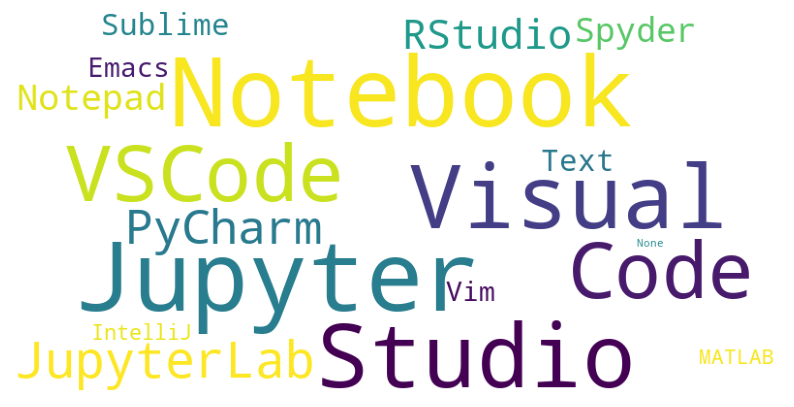

In [19]:
def word_cloud(column_num, rename_value, title):
    data_warehouse = [col for col in ds_data.columns if col.startswith(column_num)]
    column_name = ds_data[data_warehouse]
    final = column_name.melt(var_name = 'title', value_vars = column_name)
    final.drop(['title'], axis=1, inplace = True)
    final.dropna(inplace = True)
    
    text = " ".join(word for word in final[final.columns[0]])
    word_cloud = WordCloud(collocations = False, 
                           background_color = 'white', 
                           width = 800, 
                           height = 400, 
                           random_state = 21, 
                           max_font_size = 100).generate(text)
    
    plt.figure(figsize=(10,8))
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.show()
word_cloud("Q13", 'ides', 'Notebooks')

#### Hosted notebook product you should use for your work
**Colab Notebooks** and **Kaggle Notebook**

In [20]:
multiple_column("Q14", 'hosted_notes', 'Hosted Notebook', x= 'count', y='hosted_notes')

#### Data warehouse used by expert
Warehouse DS expert majorly work with are **MySQL, PostgreSQL, Google Cloud BigQuery, Microsoft SQL Server, SQLite, MongoDB** among others. This is the reason for the important of SQL, so as to be able to communicate with the warehouse.

In [21]:
multiple_column("Q35", 'warehouse', 'Data Warehouse', x= 'count', y='warehouse')

#### Viz libraries you should work with
* As a DS practitioner working perfectly and conveniently with viz libraries like **Plotly, Matplotlib, Seaborn and Ggplot** will help.

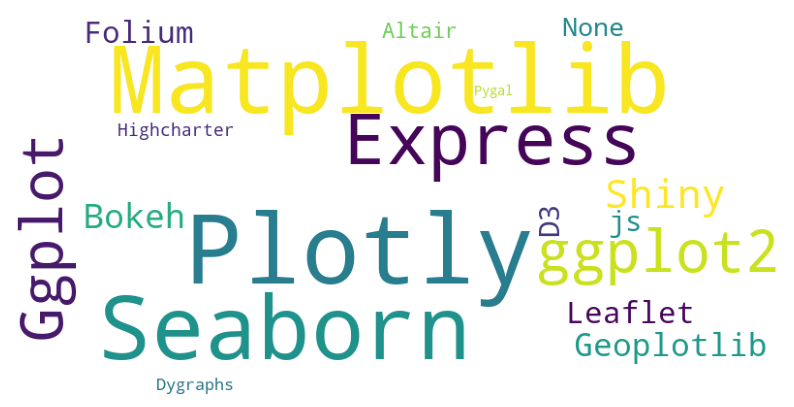

In [22]:
word_cloud("Q15", 'viz_tools', 'Visualization Libraries')

#### BI tools recommendation
**Tableau and Power BI**

In [23]:
multiple_column("Q36", 'bi_tools', 'BI Tools', x= 'bi_tools', y='count')

#### Data Scientist job description rank

In [24]:
def funnel(column_num, rename_value, title, x, y):
    data_warehouse = [col for col in ds_data.columns if col.startswith(column_num)]
    column_name = ds_data[data_warehouse]
    final = column_name.melt(var_name = 'title', value_vars = column_name)
    final.drop(['title'], axis=1, inplace = True)
    final.dropna(inplace = True)
    final = final.groupby(['value']).size().reset_index().rename(columns={'value': rename_value, 0 : 'count'}).sort_values(by = 'count', ascending=False)
    final['total'] = final['count'].sum()
    final['pertcg'] = ((final['count']/final['total'])*100).round(2)
    final = final.head(6)
    final.reset_index(drop= True)
    
    fig = go.Figure(go.Funnelarea(
        text = final[y].to_list(),
        values = final[x].to_list(),
        marker = {"colors": ["deepskyblue", "lightsalmon", "tan", "white", "silver", "yellow"]},
        textfont = {"family": "Times New Roman", "size": 50, "color": "black"}, opacity = 0.75))
    
    fig.update_layout(dict(
        title = "<span style='font-size:25px; font-family:Times New Roman'>Data Scientist Job Description</span>",
        font = dict(color = '#3b5b21'),
        margin = dict(t=170),
        width = 900,
        height= 700,
        plot_bgcolor = "white"))

    fig.update_traces(showlegend=False)
    fig.show()
funnel("Q28", 'job_desp', 'Job Description Rank', x= 'count', y= 'job_desp')

#### Media that report DS topics that you can also learn from
* Media Data Scientist use to get learn and get updated about the data world are **Kaggle(notebooks, forums, etc), Blogs(Towards Data Science, Analytics Vidhya, etc), YouTube(Kaggle YouTube, Cloud AI Adventure)**.

In [25]:
multiple_column("Q44", 'media', 'Media', x= 'count', y= 'media')

#### Cloud platform recommendation
**AWS AND GCP** are mostly used by DS

In [26]:
multiple_column("Q31", 'cloud_computing_platform', 'Frequently used cloud computing platform', x= 'count', y= 'cloud_computing_platform')

#### Cloud platform with best developer experience

In [27]:
multiple_column("Q32", 'cloud_platform', 'Cloud platform with best developer experience', x= 'count', y= 'cloud_platform')

#### Data storage

In [28]:
multiple_column("Q34", 'data_storage', 'Data Storage Product', x= 'count', y= 'data_storage')

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:Black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
       Use of ML by data scientist<a class='anchor' id='ml'></a>
    </h3>
    </div>

#### Most used ML framework
* As a DS owner it is expected to be a good statistician in at least using **Scikit-Learn, TensorFlow, PyTorch, Xgboost, Keras and LightGBM**.

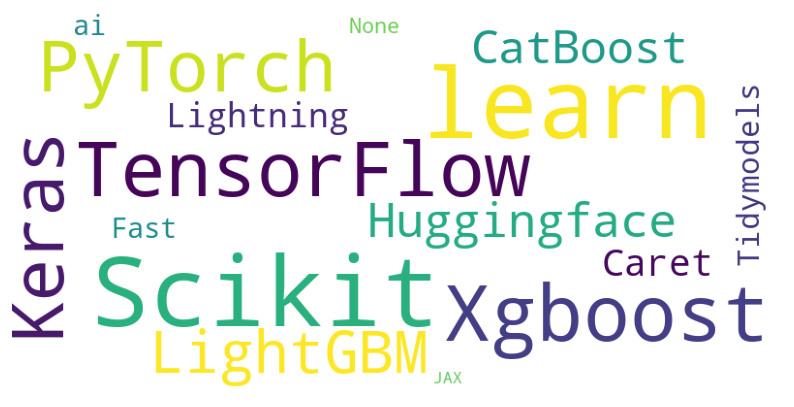

In [29]:
word_cloud("Q17", 'ml_framework', 'ML Framework')

#### ML algorithm

In [30]:
multiple_column("Q18", 'ml_algorithm', 'ML Algorithm', x= 'count', y= 'ml_algorithm')

#### ML hub/repositories used by DS expert

In [31]:
dist_graph(ds_data, 'Q22', 'ml_hub', 'ml_hub_count', 'ML hub used by DS') 

#### Rank of managed ML product used by DS expert
* Over **42%** of Data Scientist do **not** use any managed machine learning product. While for those who use it, **14%** use **Amazon SageMaker** and **11%** use **Databricks**.

In [32]:
multiple_column("Q37", 'managed_ml', 'ML used for model management by DS', x= 'count', y= 'managed_ml')

#### Model Establishment.
* With the graph there is a feasibility that organisations are embracing ML models.

In [33]:
dist_graph(ds_data, 'Q27', 'model_esth', 'model_esth_count', 'Model Establishment') 

#### Categories of computer vision method used regularly?

In [34]:
multiple_column("Q19", 'comp_vision', 'Computer Vision Method', x= 'count', y= 'comp_vision')

#### Use of Tensor Processing Unit
Well.. 51% of the Data Scientist have never used TPU while 23% of them that have used it, and have used it up to 2-5 times

In [35]:
dist_graph(ds_data, 'Q43', 'degree', 'degree_count', 'The use of Tensor Processing Unit among DS expert') 

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:Black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        Industry, Company Size, Data Team and Compensation.
    </h3>
    </div>

*Improve this section of my analysis as a contribution from @RobertoBl. Thank you!

* Both large and small scale companies employ as well as need data scientist to help them make data-driven decisions. We can see this in the chart where 10,000 and above employees size of industry have the largest portion of DS team **57%** followed by 0-49 size with 45%. 

* Majorly, every profit-making organisation need a data professional to help them see the unseen in their data and that is why data professionals have a team in each organisation, which could be small or large in size. The industry that leverage data skills most is the comp/tech industry with its correlating staff and team sizes. That is, the bigger the industry size, the larger the data team as there's tend to be more duty to delegate and vise versa.

In [36]:
def tree_map(x1, x2, x3, text):
    tree_size = ds_data.groupby([x1, x2,x3]).size().reset_index().rename(columns={0: 'count'})

    fig = px.treemap(tree_size, values='count', path=[x1,x2,x3], template='seaborn',
                    title=text)
    fig.update_traces(textinfo="label+percent parent")
    fig.show()

tree_map('Q24', 'Q25', 'Q26', "Industry + Industry Size + Data Team Size TreeMap")

#### What is the value of data scientist compensation?
* From the compensation chart, **10%** of DS professionals are compensated with $0-999.


In [37]:
dist_graph(ds_data, 'Q29', 'compensation', 'comp_count', 'Compensation') 

* compensation rate compared to industry, Comp/Tech which is the largest industry with DS team been compensated with mostly $0-999, follow by 40,000-49,999 compensation amount.

* In terms of degree, well.. even in the Comp/Tech industry and as a M.Sc holder, employees still receive $0-999 i.e the compensation rate is quite distributed, for instance some masters degree holder receives more compared to their peers, so employees compensation in this chart is not by degree, this could be through skills or organisation impact.

* In the accounting/finance industry data scientist are compensated better compared to comp/tech industry in terms of compensation rate.

* Another interesting point is no data scientist in medical/pharmaceutical line among other industry that have any educational record.

In [38]:
tree_map('Q29', 'Q24', 'Q8', "Industry + Compensation")

#### Is there gender bias on how Data Scientist are compensated?
* The below chart might not be a gender bias knowing we have over 83% male data scientist who filled the survey compared to female. A summary of the chart shows larger male portion for each compensation rate.

In [39]:
df_group = ds_data.groupby(['Q29', 'Q3']).size().reset_index(name='counts')

fig = px.sunburst(df_group, path=['Q29', 'Q3'], values=df_group['counts'])
fig.update_layout(
    margin = dict(t=0, l=0, r=0, b=0)
)
fig.show()

#### Compensation by country
* Indians are compensated more in general term with 0-99 having **16%** (which is the highest) portion of compensation given. 
* USA also ranks the second most compensated country, with **26%** record of  (150,000-199,999) compensation amount to its employees, from observation Americans are compensated with good pay compared to india. What do i mean? only few employees are compensated with $0-99 amount in USA.

In [ ]:
def tree_map_2(x1, x2, text):
    tree_size = ds_data.groupby([x1, x2]).size().reset_index().rename(columns={0: 'count'})

    fig = px.treemap(tree_size, values='count', path=[x1,x2], template='seaborn',
                    title=text)
    fig.update_traces(textinfo="label+percent parent")
    fig.show()

tree_map_2('Q4', 'Q29', "Country vs Compensation TreeMap")

## In Conclusion

The above analysis can be looked into if you are just getting started in DS, to give a guidiance on part to follow and priorities depending on your preference. Some of my pinned point in the technical section are;

* Programming language to learn.
* Viz library and BI tools you should know how to use.
* The adaptation of ML and cloud computing by DS.
* Job description.
* Media used by DS to learn, unlearn and relearn.
* Industry, salary and compensation wide matter.


## Reference:
[1.] https://www.kaggle.com/code/varunsaikanuri/2022-kaggle-survey-analysis

[2.] https://www.kaggle.com/code/eraikako/data-science-and-mlops-landscape-in-industry

[3.] [Image](https://www.onlinemanipal.com/blogs/data-science-lifecycle-explained)

[4.] [Make your notebook better](https://www.kaggle.com/code/alejopaullier/make-your-notebooks-look-better)
